In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
X=pd.DataFrame(data.data,columns=data.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y=pd.Series(data.target)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [7]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
X.shape

(506, 13)

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [10]:
gr=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [11]:
model=gr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [12]:
r2_score(y_pred,y_test)

0.6450128535927293

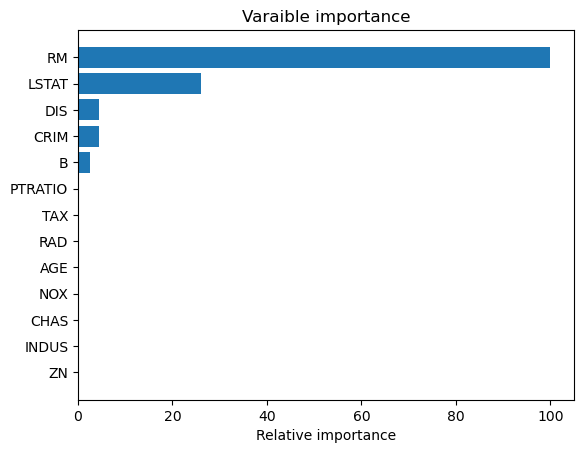

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

#plot feature importance
feature_importance=model.feature_importances_

# make importance relative to max importance
feature_importance=100.0 *(feature_importance/feature_importance.max())

sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+ .5

plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,load_boston().feature_names[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Varaible importance')
plt.show()

## Lets tune the hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,0.1,0.01,0.10,0.05],'n_estimators':[100,150,200,250],'max_leaf_nodes':[8,16,24,32]}

tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.1, 'max_leaf_nodes': 8, 'n_estimators': 200},
 0.8790997061418107)

In [18]:
gr=GradientBoostingRegressor(max_leaf_nodes=8,n_estimators=200,learning_rate=0.1)
model=gr.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_pred,y_test)

0.8861406465801225